In [ ]:
Client ID
QGbBXdbzvOAUR3423KFlzg

API Key
-zvkUrFmC73D7V53_VY-sIT9JM1F69NtrMnR5oi9gfkP9ds2LCbXE4t_TW-WHc-0jnVliYXPCXaxL5w1c7XxraLaFlYWp0wF29InnQXhP72BfsX-pVjoS9HMPK8SXXYx

Using Yelp to analyze popular restaurants in Foxboro

In [92]:
import requests

API_key = '-zvkUrFmC73D7V53_VY-sIT9JM1F69NtrMnR5oi9gfkP9ds2LCbXE4t_TW-WHc-0jnVliYXPCXaxL5w1c7XxraLaFlYWp0wF29InnQXhP72BfsX-pVjoS9HMPK8SXXYx'
Endpoint = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization' : 'bearer {}'.format(API_key)}

Parameters = {'term':'restaurant', 'limit':50, 'radius':40000, 'location': 'Foxborough'}

response = requests.get(url = Endpoint, params = Parameters, headers = headers)

data = response.json()

data['businesses']




[{'id': 'lP7MuhI0tIMp7ai2MjZI1A',
  'alias': 'union-straw-foxborough',
  'name': 'UNION STRAW',
  'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/qLOQCz7t0CtgzdbOMGTjQA/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/union-straw-foxborough?adjust_creative=QGbBXdbzvOAUR3423KFlzg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=QGbBXdbzvOAUR3423KFlzg',
  'review_count': 50,
  'categories': [{'alias': 'newamerican', 'title': 'American (New)'}],
  'rating': 4.0,
  'coordinates': {'latitude': 42.066042, 'longitude': -71.2495005423279},
  'transactions': [],
  'price': '$$',
  'location': {'address1': '8 Mechanic St',
   'address2': None,
   'address3': 'Entrance and Parking located between 17 & 21 Bird St',
   'city': 'Foxborough',
   'zip_code': '02035',
   'country': 'US',
   'state': 'MA',
   'display_address': ['8 Mechanic St',
    'Entrance and Parking located between 17 & 21 Bird St',
    'Foxborough, MA 02035']},
  'phone': '+17742153377',


Printing out a list of the businesses and a count to confirm that 50 were found

In [97]:
count = 0
for biz in data['businesses']:
    print(biz['name'])
    count = count +1
print(count)

UNION STRAW
Tavolino
Davio's Northern Italian Steakhouse
Six String Grill & Stage
The Red Rooster Bar & Grill
The Square Kitchen & Bar
Cafe Assisi
Chickie Flynn's
Cibo Matto Caffe
Novatos Bar and Grill
Simcha
Luciano's Restaurant
Bar Louie - Patriot Place
Saga Hibachi Steakhouse and Sushi Bar
Olive & Mint
Scorpion Bar Patriot Place
Bangkok Cafe
Horse N' Carriage
CBS Scene Restaurant & Bar
Trattoria Della Nonna
Skipjack's Best Fresh Seafood
The Raven's Nest
Table At 10
Jake n JOES - Foxboro
Havana Café
Twenty8 Food & Spirits
The Tavern From Tower Square
The Feisty Greek
Sal's & Mal's Pizzeria
Blue Fin Lounge
Vico Ristorante Italiano
Slack's Oyster House & Grill
Asian Ginger
Clyde's Roadhouse Bar & Grille
Fresh Catch Restaurant and Sushi Bar
The Commons Neighborhood Eatery
KC's Classic Burger Bar
Mandarin Chef
Rally Point Inn & Pub
Mai Pearl
Habibi's Middle Eastern Kitchen
Splitsville
Commonwealth BBQ
Red Robin Gourmet Burgers
Patriot Tavern
Fiesta Mexican Restaurant
Tessie's bar & kitch

Cleaning up the data and graphing the top 25 restaurants based on yelp reviews

                                  0    1    2  \
25                 Commonwealth BBQ    4  391   
26        Fiesta Mexican Restaurant    4  173   
27                Horse N' Carriage    4   55   
28          KC's Classic Burger Bar    4  354   
29             Luciano's Restaurant    4  263   
30                    Mandarin Chef    4   58   
31            Novatos Bar and Grill    4  115   
32                   Patriot Tavern    4   51   
33            Rally Point Inn & Pub    4   10   
34           Sal's & Mal's Pizzeria    4   85   
35     Slack's Oyster House & Grill    4   56   
36                      Table At 10    4   94   
37           Tessie's bar & kitchen    4    3   
38  The Commons Neighborhood Eatery    4   87   
39      The Red Rooster Bar & Grill    4   92   
40         The Square Kitchen & Bar    4   53   
41     The Tavern From Tower Square    4  129   
42            Trattoria Della Nonna    4   97   
43                      UNION STRAW    4   50   
44       Yamato Hiba

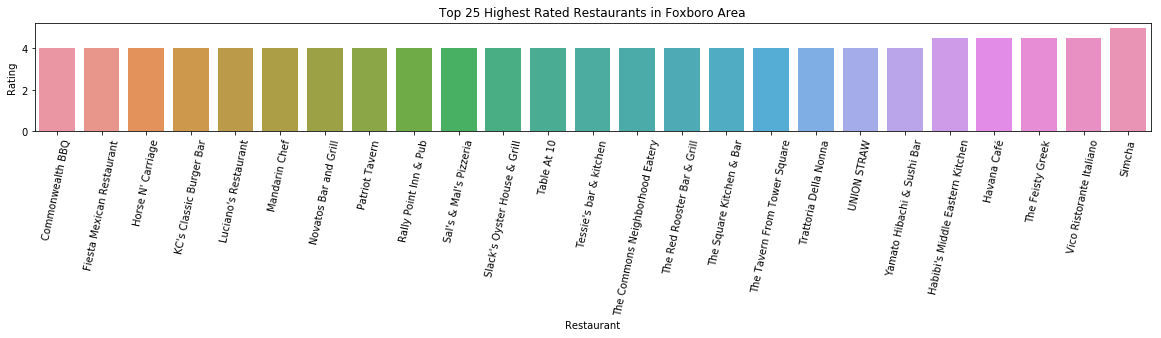

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Name = []
Rating = []
Rating_ct =[]

for biz in data['businesses']:
    Name.append(biz['name'])
    Rating.append(biz['rating'])
    Rating_ct.append(biz['review_count'])

Biz_data = pd.DataFrame([Name,Rating,Rating_ct])

Biz_data = Biz_data.transpose()
Biz_data['Name'] = Biz_data[0]
Biz_data['Rating'] = Biz_data[1]
Biz_data['Rating_ct'] = Biz_data[2]

Biz_data = Biz_data.sort_values(['Rating', 'Name']).reset_index(drop=True)
Biz_data_top = Biz_data.tail(25)
print (Biz_data_top)


plt.figure(figsize=(20,2))
    
ax = sns.barplot(x=Biz_data_top['Name'], y=Biz_data_top['Rating'], data=Biz_data_top)
ax.set(xlabel="Restaurant", ylabel='Rating')
ax.set(title='Top 25 Highest Rated Restaurants in Foxboro Area')
plt.xticks(rotation=78)
plt.show()

Sorting by how many times the restaurant was rated and graphing the top 25

                                        0    1    2  \
25                  Novatos Bar and Grill    4  115   
26                                 Avenue    4  121   
27           The Tavern From Tower Square    4  129   
28         Clyde's Roadhouse Bar & Grille  3.5  156   
29        Habibi's Middle Eastern Kitchen  4.5  163   
30                            Havana Café  4.5  164   
31                  Jake n JOES - Foxboro  2.5  168   
32                       The Raven's Nest  3.5  172   
33              Fiesta Mexican Restaurant    4  173   
34                         Red Wing Diner  3.5  176   
35  Saga Hibachi Steakhouse and Sushi Bar  2.5  191   
36             Scorpion Bar Patriot Place  2.5  220   
37   Fresh Catch Restaurant and Sushi Bar  3.5  241   
38    Davio's Northern Italian Steakhouse  3.5  255   
39                           Asian Ginger  3.5  258   
40                   Luciano's Restaurant    4  263   
41          Skipjack's Best Fresh Seafood    3  266   
42        

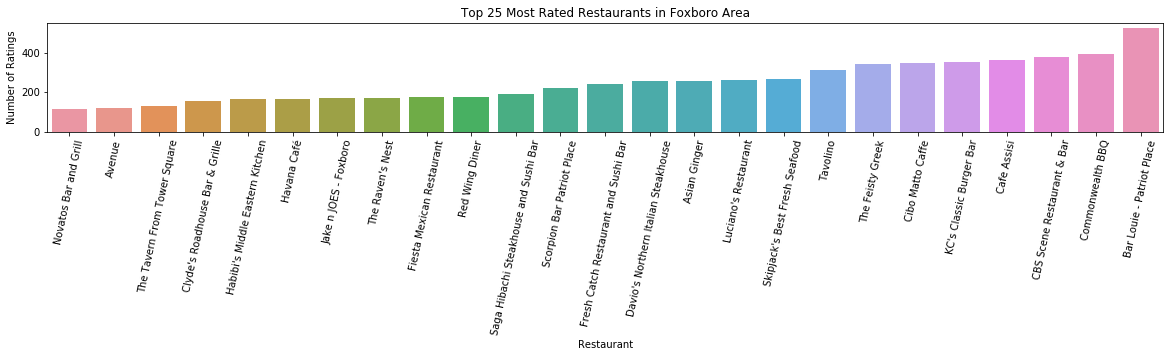

In [120]:
Biz_data = Biz_data.sort_values(['Rating_ct', 'Name']).reset_index(drop=True)
Biz_data_top = Biz_data.tail(25)
print (Biz_data_top)


plt.figure(figsize=(20,2))
    
ax = sns.barplot(x=Biz_data_top['Name'], y=Biz_data_top['Rating_ct'], data=Biz_data_top)
ax.set(xlabel="Restaurant", ylabel='Number of Ratings')
ax.set(title='Top 25 Most Rated Restaurants in Foxboro Area')
plt.xticks(rotation=78)
plt.show()

Devising a way to decipher the 'best restaurants'. The 'ratings' is not entirely accurate because some are only rated a few times due possibly to how long they have been open, or perhaps the type/age of guests visiting that restaraunt. Bar Louie is a very popular restaurant in Patriot Place but it's rating is only 2.5. Meanwhile, the fiesty greek has 344 reviews with an average of 4.5 rating. Perhaps yelp has more data such as opening date or all the total reviews so that a standard deviation could be calculated.

                                       0    1    2  \
25                 Trattoria Della Nonna    4   97   
26                          Bangkok Cafe    4  110   
27                 Novatos Bar and Grill    4  115   
28        Clyde's Roadhouse Bar & Grille  3.5  156   
29                                Avenue    4  121   
30          The Tavern From Tower Square    4  129   
31                      The Raven's Nest  3.5  172   
32                        Red Wing Diner  3.5  176   
33              Vico Ristorante Italiano  4.5  110   
34            CBS Scene Restaurant & Bar  2.5  378   
35         Skipjack's Best Fresh Seafood    3  266   
36             Fiesta Mexican Restaurant    4  173   
37  Fresh Catch Restaurant and Sushi Bar  3.5  241   
38   Davio's Northern Italian Steakhouse  3.5  255   
39                          Asian Ginger  3.5  258   
40             Bar Louie - Patriot Place  2.5  523   
41       Habibi's Middle Eastern Kitchen  4.5  163   
42                          

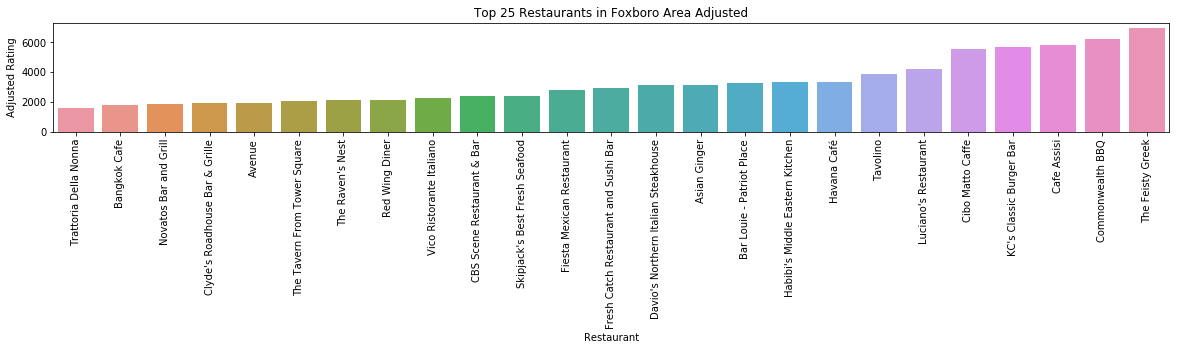

In [119]:
Biz_data['adjusted'] = (Biz_data['Rating']**2)*Biz_data['Rating_ct']

Biz_data = Biz_data.sort_values(['adjusted', 'Name']).reset_index(drop=True)
Biz_data_top = Biz_data.tail(25)
print (Biz_data_top)

plt.figure(figsize=(20,2))
    
ax = sns.barplot(x=Biz_data_top['Name'], y=Biz_data_top['adjusted'], data=Biz_data_top)
ax.set(xlabel="Restaurant", ylabel='Adjusted Rating')
ax.set(title='Top 25 Restaurants in Foxboro Area Adjusted')
plt.xticks(rotation=90)
plt.show()